In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv


In [89]:
df=pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv")
df.head()
# df.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [90]:
df.dropna(axis=0)
df.dropna(axis=1)

df.iloc[:,0]

0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64

In [91]:
s=set(df["type"])
print(s)

print(df.loc[0,["type"]])
print(df["type"][0])

{'PAYMENT', 'CASH_OUT', 'CASH_IN', 'DEBIT', 'TRANSFER'}
type    PAYMENT
Name: 0, dtype: object
PAYMENT


In [92]:
l=[]
for i in range(len(df["type"])):
    if df["type"][i]=="CASH_IN" or df["type"][i]=="PAYMENT" or df["type"][i]=="DEBIT":
        l.append(i)

In [93]:
df_dropped=df.drop(l,axis=0)
df_reset=df_dropped.reset_index(drop=True)
df_reset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
for i in range(len(df["type"])):
    if df["type"][i]=="TRANSFER" and df["isFraud"][i]==1:
        print(df.loc[i,:])
        break

In [ ]:
# for i in range(len(df_reset["nameOrig"])):
#     df_reset.at[i,"nameOrig"]=df_reset["nameOrig"][i][:1]
#     df_reset.at[i,"nameDest"]=df_reset["nameDest"][i][:1]
# df_reset
df_reset['nameOrig'] = df_reset['nameOrig'].str[0]
df_reset['nameDest'] = df_reset['nameDest'].str[0]
df_reset

In [116]:
l1=[]
l2=[]
for i in range(len(df_reset["isFraud"])):
    if df_reset["isFraud"][i]==1:
        l1.append(i)
    else:
        l2.append(i)
        
df_reset1=df_reset.drop(l2,axis=0)
df_reset2=df_reset.drop(l1,axis=0)
df_reset2=df_reset2.sample(n=8213)
df_reset=pd.concat([df_reset1,df_reset2],axis=0)
df_reset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.00,0.00,1,0
123,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.00,0.00,1,0
124,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.00,0.00,1,0
192,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1536284,259,CASH_OUT,112133.47,C1959206825,20019.0,0.0,C178356059,1285616.15,1397749.62,0,0
1990734,327,CASH_OUT,168928.70,C2069204896,0.0,0.0,C501121600,1439332.92,1608261.62,0,0
202129,19,TRANSFER,65196.79,C733445404,8075.0,0.0,C1776945016,466309.09,889002.44,0,0
2050238,331,TRANSFER,77907.14,C1324370252,11587.0,0.0,C187924628,152849.60,284424.69,0,0


In [117]:

df2=df_reset.drop(["isFraud"],axis=1)


y=df_reset["isFraud"]
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.00,0.00,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.00,0.00,0
123,1,TRANSFER,2806.00,C1420196421,2806.0,0.0,C972765878,0.00,0.00,0
124,1,CASH_OUT,2806.00,C2101527076,2806.0,0.0,C1007251739,26202.00,0.00,0
192,1,TRANSFER,20128.00,C137533655,20128.0,0.0,C1848415041,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1536284,259,CASH_OUT,112133.47,C1959206825,20019.0,0.0,C178356059,1285616.15,1397749.62,0
1990734,327,CASH_OUT,168928.70,C2069204896,0.0,0.0,C501121600,1439332.92,1608261.62,0
202129,19,TRANSFER,65196.79,C733445404,8075.0,0.0,C1776945016,466309.09,889002.44,0
2050238,331,TRANSFER,77907.14,C1324370252,11587.0,0.0,C187924628,152849.60,284424.69,0


In [118]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df2["type"])
# Drop column B as it is now encoded
df2 = df2.drop("type",axis = 1)
# Join the encoded df
df2 = df2.join(one_hot)
df2=df2.drop(["nameOrig","nameDest"],axis=1)
x=df2
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,TRANSFER
0,1,181.00,181.0,0.0,0.00,0.00,0,False,True
1,1,181.00,181.0,0.0,21182.00,0.00,0,True,False
123,1,2806.00,2806.0,0.0,0.00,0.00,0,False,True
124,1,2806.00,2806.0,0.0,26202.00,0.00,0,True,False
192,1,20128.00,20128.0,0.0,0.00,0.00,0,False,True
...,...,...,...,...,...,...,...,...,...
1536284,259,112133.47,20019.0,0.0,1285616.15,1397749.62,0,True,False
1990734,327,168928.70,0.0,0.0,1439332.92,1608261.62,0,True,False
202129,19,65196.79,8075.0,0.0,466309.09,889002.44,0,False,True
2050238,331,77907.14,11587.0,0.0,152849.60,284424.69,0,False,True


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
x_train = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9905660377358491
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1611
           1       0.99      0.99      0.99      1675

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



Confusion Matrix:
[[1591   20]
 [  11 1664]]


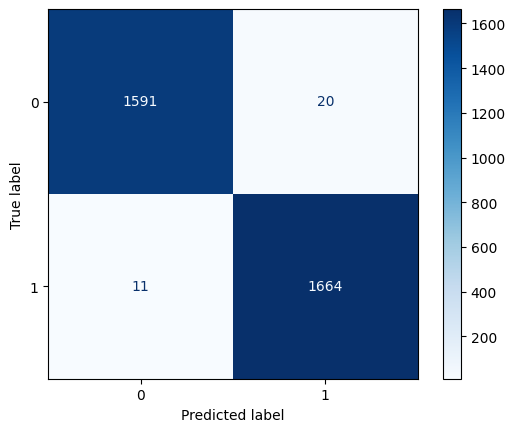

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()